In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>")) # sets width of notebook cell

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
app_train = pd.read_csv('../data/raw/application_train.csv')

In [ ]:
app_train.info()

In [ ]:
print(f'Dataframe has {app_train.shape[0]} rows and {app_train.shape[1]} columns')

In [ ]:
pd.set_option('display.max_columns', 122)
pd.set_option('display.max_rows', 122)

In [ ]:
count = app_train.isnull().sum().sort_values(ascending=False)
nan_percentage = count/len(app_train)*100
nan_count_df = pd.concat([count,nan_percentage],axis = 1, keys=['Count', '% of null'])
nan_count_df

In [ ]:
print(f'DataFrame has {app_train.duplicated().sum()} duplicate rows.')

In [ ]:
no_index_dupl = app_train.drop('SK_ID_CURR', axis=1).duplicated().sum()
print(f'DataFrame has {no_index_dupl} duplicate data.')

In [ ]:
app_train.head()

In [ ]:
pd.DataFrame(app_train.dtypes).rename(columns={0:'DataTypes'})


In [ ]:
app_train.FLAG_DOCUMENT_19.unique()

In [ ]:
app_train.columns

In [ ]:
non_continuous = [col for col in app_train.columns if app_train[col].dtype not in ['float64'] and col != 'SK_ID_CURR']

In [ ]:
d = {}
for col in non_continuous:
    d[col] = app_train[col].unique().tolist()

In [ ]:
for col in non_continuous:
    print(col,app_train[col].unique())

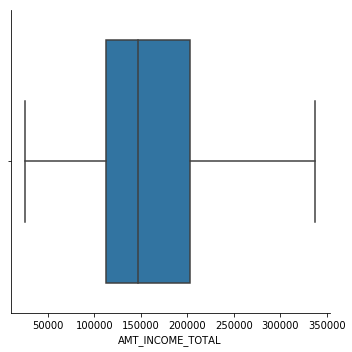

In [5]:
sns.catplot(x='AMT_INCOME_TOTAL',kind='box',sym='', data=app_train)

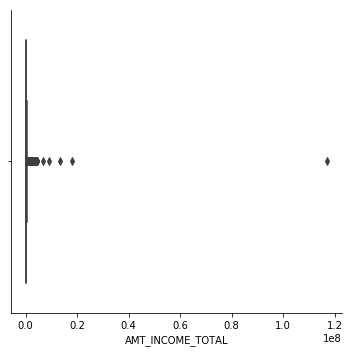

In [6]:
sns.catplot(x='AMT_INCOME_TOTAL',kind='box', data=app_train)

In [7]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [8]:
app_train.sort_values(by='AMT_INCOME_TOTAL',ascending=False).head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
131127,252084,0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
103006,219563,0,Revolving loans,M,Y,Y,0,4500000.0,2250000.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
204564,337151,0,Cash loans,M,N,N,0,4500000.0,450000.0,47749.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
187833,317748,0,Cash loans,M,N,N,0,4500000.0,835380.0,42651.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
287463,432980,0,Cash loans,M,Y,Y,0,4500000.0,1755000.0,61132.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
181698,310601,0,Cash loans,M,Y,Y,1,3950059.5,675000.0,66217.5,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
app_train.sort_values(by='AMT_CREDIT',ascending=False).head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
133766,255139,0,Cash loans,F,Y,N,1,1307587.5,4050000.0,100197.0,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
119681,238782,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
120757,240007,0,Cash loans,M,N,N,0,587250.0,4050000.0,106969.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
288455,434170,0,Cash loans,F,Y,N,1,450000.0,4050000.0,106839.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
110459,228135,0,Cash loans,M,N,N,2,864900.0,4050000.0,102384.0,...,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0
287732,433294,0,Cash loans,F,Y,N,1,405000.0,4050000.0,102514.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
95571,210956,0,Cash loans,M,N,Y,0,430650.0,4031032.5,102033.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
186230,315893,1,Cash loans,F,N,N,0,458550.0,4027680.0,106380.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
app_train.sort_values(by='AMT_INCOME_TOTAL',ascending=False).head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
131127,252084,0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
103006,219563,0,Revolving loans,M,Y,Y,0,4500000.0,2250000.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
204564,337151,0,Cash loans,M,N,N,0,4500000.0,450000.0,47749.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
187833,317748,0,Cash loans,M,N,N,0,4500000.0,835380.0,42651.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
287463,432980,0,Cash loans,M,Y,Y,0,4500000.0,1755000.0,61132.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
181698,310601,0,Cash loans,M,Y,Y,1,3950059.5,675000.0,66217.5,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


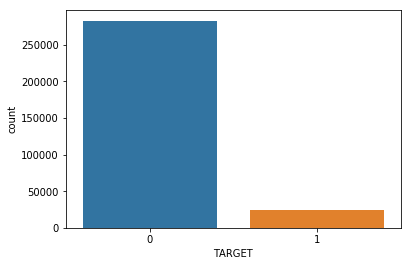

In [11]:
sns.countplot(x='TARGET', data=app_train)

In [12]:
df_test = app_train.TARGET.value_counts()
df_test

0    282686
1     24825
Name: TARGET, dtype: int64

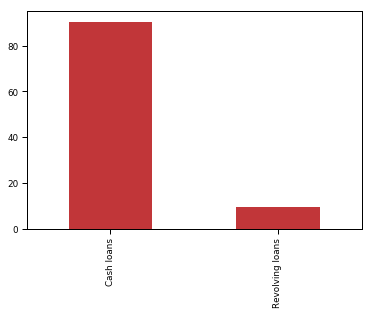

In [29]:
app_train['NAME_CONTRACT_TYPE'].value_counts(normalize=True).mul(100).plot(kind='bar')
plt.show()

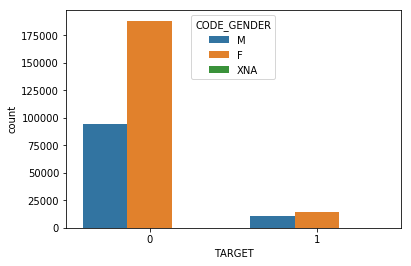

In [14]:
sns.countplot(x='TARGET',hue='CODE_GENDER', data=app_train)

In [15]:
app_train.groupby('CODE_GENDER')['TARGET'].value_counts()

CODE_GENDER  TARGET
F            0         188278
             1          14170
M            0          94404
             1          10655
XNA          0              4
Name: TARGET, dtype: int64

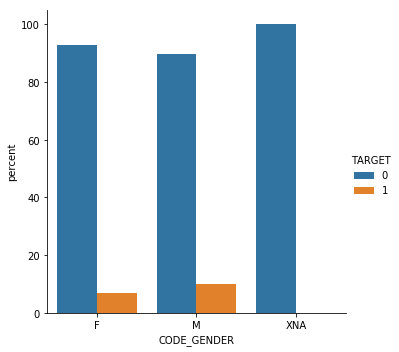

In [16]:
app_train.groupby('CODE_GENDER')['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'),x='CODE_GENDER',y='percent',hue='TARGET',kind='bar')

In [17]:
sns.set_palette('RdBu')
sns.set_context('paper')

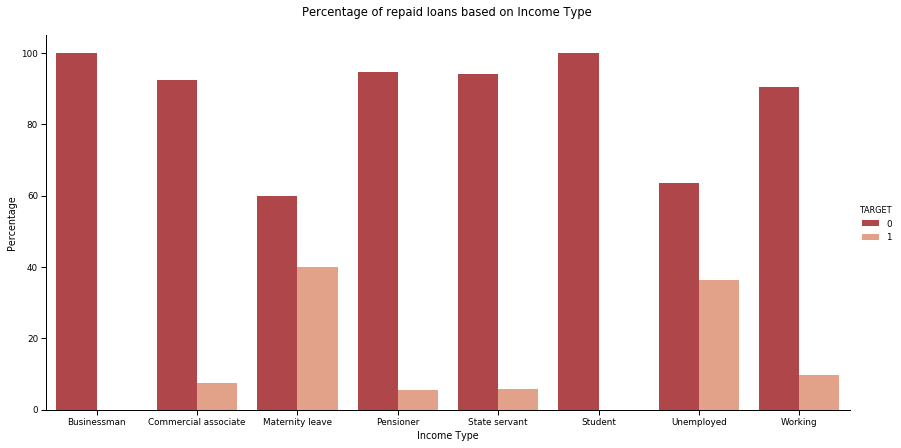

In [18]:
g = app_train.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts(normalize=True).mul(100).\
rename('percent').reset_index()\
.pipe((sns.catplot,'data'),x='NAME_INCOME_TYPE',y='percent',hue='TARGET',height=6, aspect=8/4,kind='bar')
(g.set(xlabel='Income Type', ylabel='Percentage',label='Paid Off'),
)
g.fig.suptitle('Percentage of repaid loans based on Income Type',y=1.03)
plt.show()

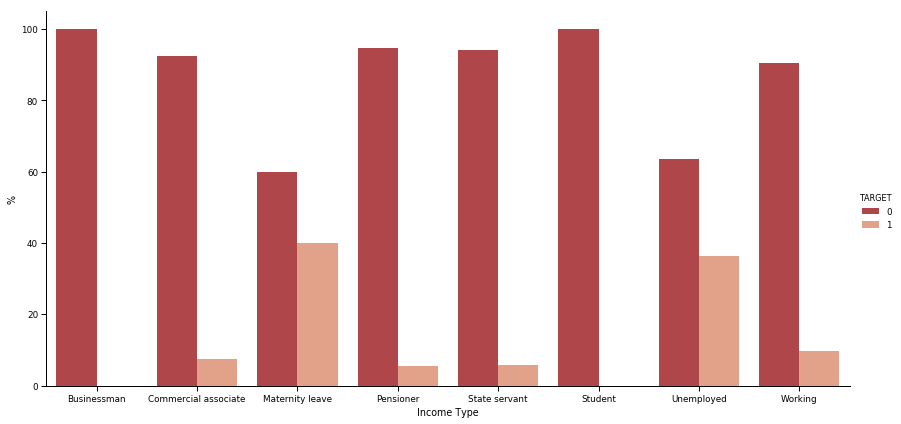

In [19]:
g = app_train.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts(normalize=True).mul(100).\
rename('percent').reset_index()\
.pipe((sns.catplot,'data'),x='NAME_INCOME_TYPE',y='percent',hue='TARGET',height=6, aspect=8/4,kind='bar')
(g.set_axis_labels("Income Type",'%'))

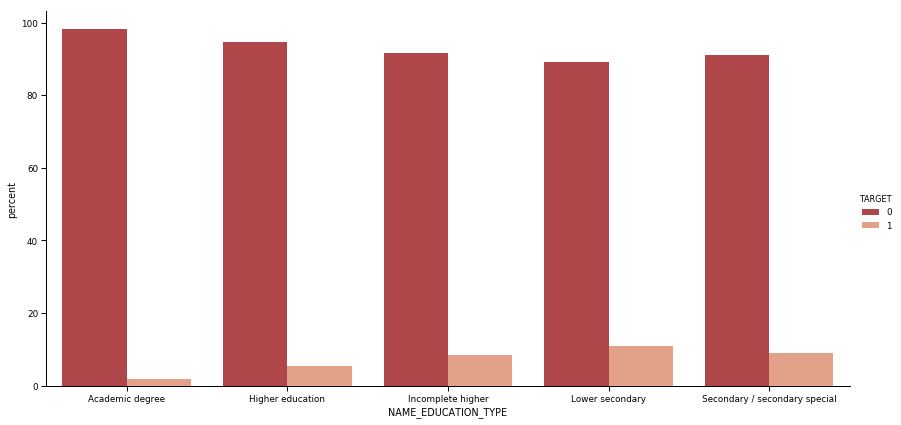

In [20]:
g = app_train.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts(normalize=True).mul(100).\
rename('percent').reset_index()\
.pipe((sns.catplot,'data'),x='NAME_EDUCATION_TYPE',y='percent',hue='TARGET',height=6, aspect=8/4,kind='bar')

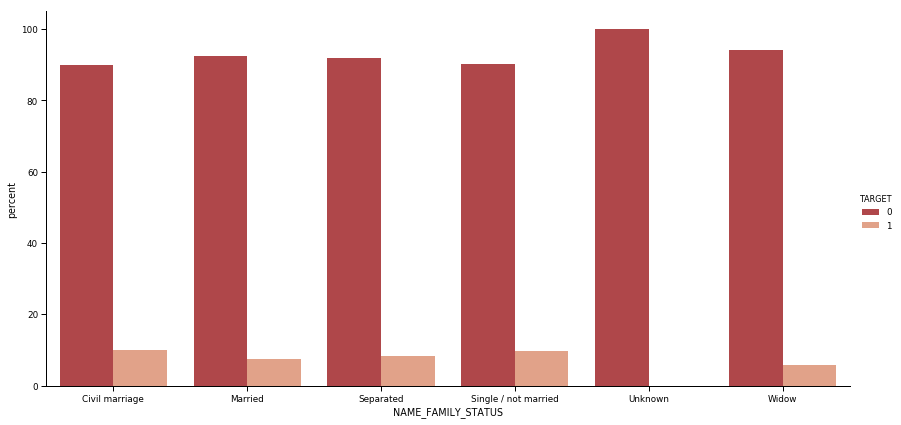

In [21]:
g = app_train.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts(normalize=True).mul(100).\
rename('percent').reset_index()\
.pipe((sns.catplot,'data'),x='NAME_FAMILY_STATUS',y='percent',hue='TARGET',height=6, aspect=8/4,kind='bar')

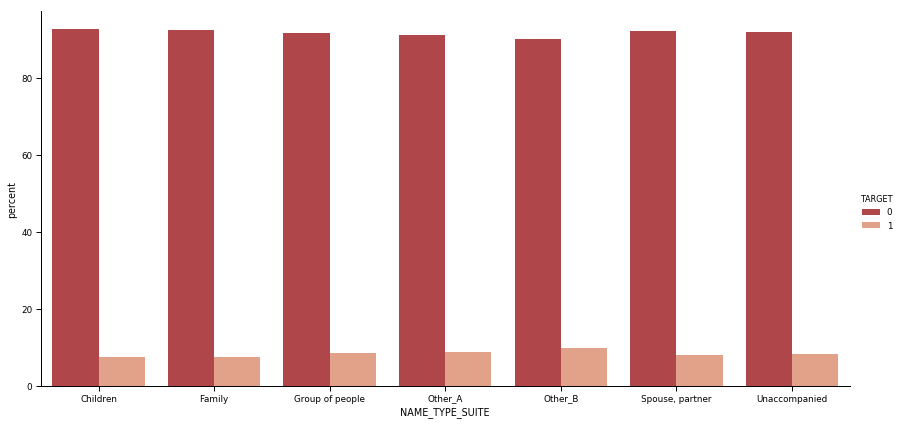

In [22]:
g = app_train.groupby('NAME_TYPE_SUITE')['TARGET'].value_counts(normalize=True).mul(100).\
rename('percent').reset_index()\
.pipe((sns.catplot,'data'),x='NAME_TYPE_SUITE',y='percent',hue='TARGET',height=6, aspect=8/4,kind='bar')

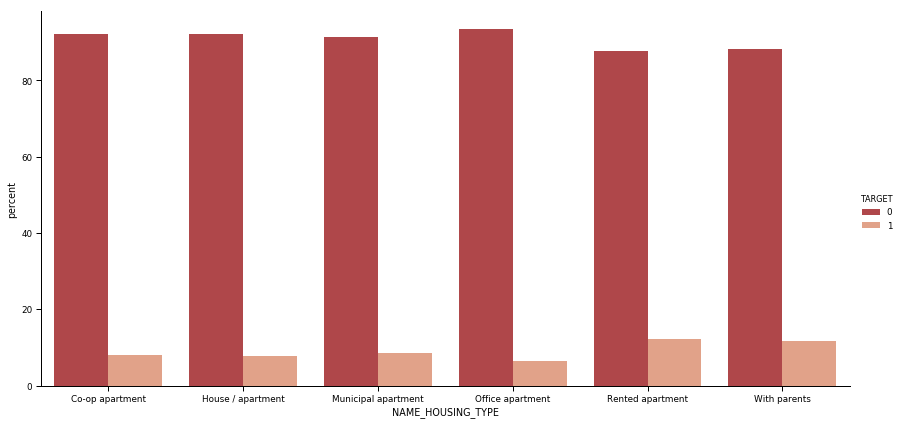

In [23]:
g = app_train.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts(normalize=True).mul(100).\
rename('percent').reset_index()\
.pipe((sns.catplot,'data'),x='NAME_HOUSING_TYPE',y='percent',hue='TARGET',height=6, aspect=8/4,kind='bar')

In [24]:
days = [ 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']

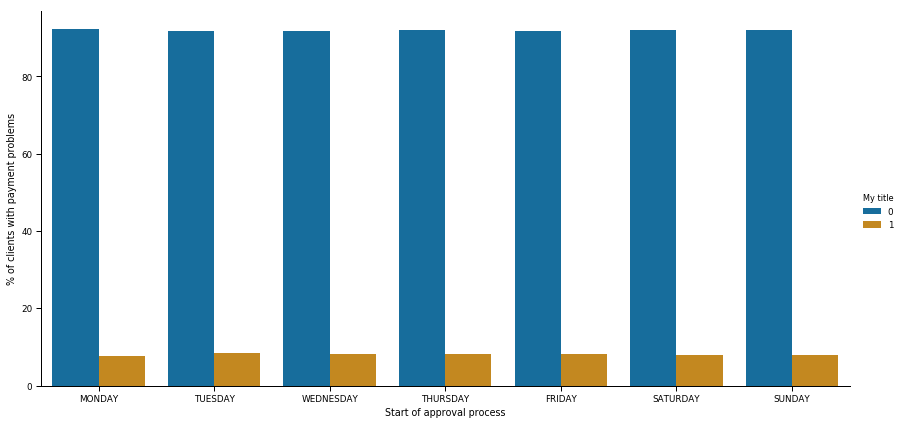

In [25]:
g = app_train.groupby('WEEKDAY_APPR_PROCESS_START')['TARGET'].value_counts(normalize=True).mul(100).rename('%').reset_index()\
.pipe((sns.catplot,'data'),x='WEEKDAY_APPR_PROCESS_START',y='%',hue='TARGET', order=days, height=6, aspect=8/4,kind='bar',palette='colorblind',legend_out=True)
g.set(xlabel='Start of approval process', ylabel='% of clients with payment problems',label='Paid Off')
new_title = 'My title'
g._legend.set_title(new_title)

Visualize relationship between amount of loan and day of approval process

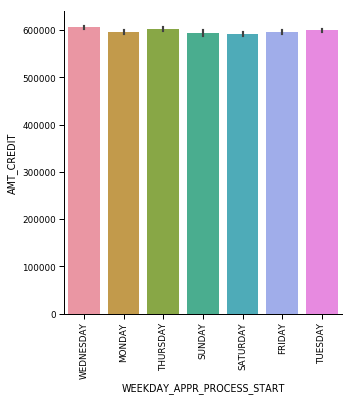

In [26]:
g = sns.catplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_CREDIT', data=app_train, kind='bar')
plt.xticks(rotation=90)
plt.show()

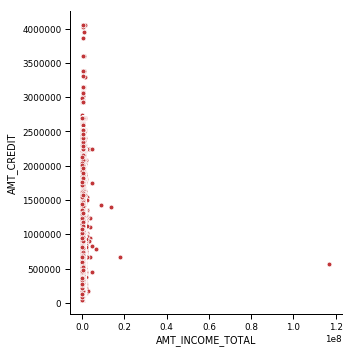

In [27]:
sns.relplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',data=app_train)

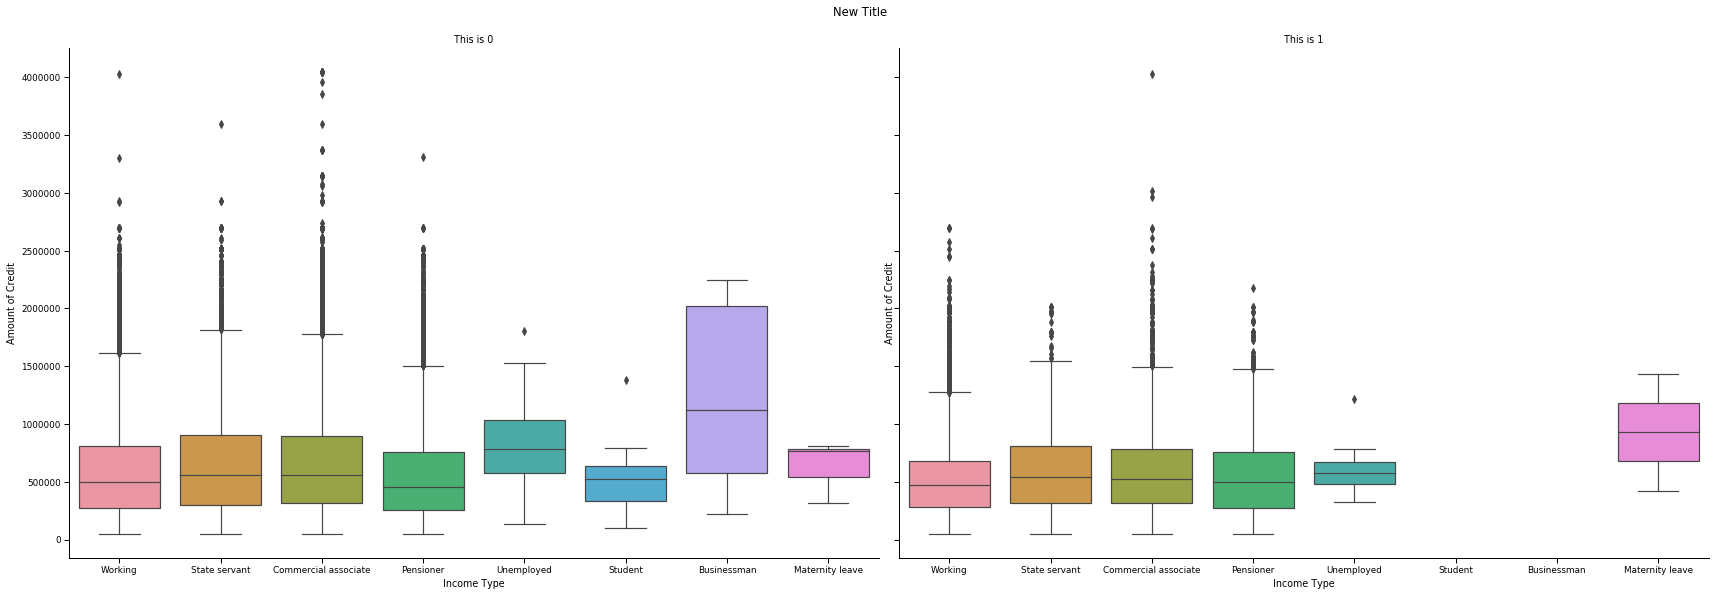

In [28]:
g = sns.catplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT',col='TARGET', data=app_train, kind='box',height=8,aspect=1.5,legend_out=True)
g.set(xlabel='Income Type',ylabel='Amount of Credit')
g.fig.suptitle("New Title",y=1.03)
g.set_titles('This is {col_name}')
plt.show()

In [ ]:
df_test = app_train[app_train.AMT_INCOME_TOTAL.lt(117000000)]

In [ ]:
sns.relplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT',hue='TARGET',size='AMT_CREDIT', data=df_test, kind='scatter',height=8,aspect=1.5)

In [ ]:
sns.distplot(-app_train['DAYS_BIRTH']/365)

In [ ]:
sns.distplot(-app_train['DAYS_BIRTH']/365,kde_kws={'shade':True},hist=False, rug=True)

In [ ]:
pd.crosstab(app_train['HOUR_APPR_PROCESS_START'],pd.Categorical(app_train['WEEKDAY_APPR_PROCESS_START'],categories=days)).sort_values('HOUR_APPR_PROCESS_START',ascending=False)

In [ ]:
plt.figure(figsize=(30,10))
g = sns.heatmap(pd.crosstab(app_train['HOUR_APPR_PROCESS_START'],pd.Categorical(app_train['WEEKDAY_APPR_PROCESS_START'],categories=days)).sort_values('HOUR_APPR_PROCESS_START',ascending=False)\
                ,annot=True, fmt='.0f', cmap="coolwarm")
plt.show()